In [2]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
x.shape

torch.Size([2, 5])

In [5]:
y = torch.rand([2,5])
print(y)

tensor([[0.2375, 0.4304, 0.9713, 0.4366, 0.6763],
        [0.1278, 0.6120, 0.3879, 0.1423, 0.5027]])


In [6]:
#We need to flatten y before puttin in neural network
y.view([1,10])

tensor([[0.2375, 0.4304, 0.9713, 0.4366, 0.6763, 0.1278, 0.6120, 0.3879, 0.1423,
         0.5027]])

In [8]:
#We need to reasign view, because before that y looking like [2,5]
y = y.view([1,10])
y

tensor([[0.2375, 0.4304, 0.9713, 0.4366, 0.6763, 0.1278, 0.6120, 0.3879, 0.1423,
         0.5027]])

In [10]:
import torchvision
from torchvision import transforms, datasets

In [12]:
train = datasets.MNIST("", 
                       train = True, 
                       download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", 
                       train = False, 
                       download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [13]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [14]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [15]:
x, y = data[0][0], data[1][0]
print(y)

tensor(5)


In [16]:
import matplotlib.pyplot as plt

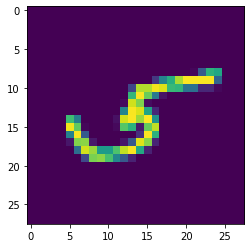

In [19]:
plt.imshow(data[0][0].view(28,28))
# We changed shape from [1,28,28] to [28,28] (Normal image)
plt.show()

In [20]:
print(data[0][0].shape)
# Shaping is very important, with normal image we will get something like [28,28], 
# but this first '1' is crucial for DL.

torch.Size([1, 28, 28])


In [24]:
# Checking if we have balanced data
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [25]:
# Calculating percent of given number in dataset
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [26]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()               # If we forgot about that line we get error : 
                                         # 'AttributeError: cannot assign module before Module.__init__() call'
            
        self.fc1 = nn.Linear(784, 64)    # (Input, output) - Input is 784, because 28*28, output is 64
                                         # Input is our flattened image, output is whatever we want
                                         # For convolution we get nn.Conv instead
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)     # 10 in output because we get ten classes - 0,1,2,...,9
            
    def forward(self, x):                # Connection between layers
                                         # We can throw here more complex logic to build more advanced models
                                         # we can put here like if - else etc. we can also put different type
                                         # of layers like some visual layers and next some text layers.
            
        x = F.relu(self.fc1(x))          # relu - rectified linear - activation function ( in this example 
                                         # over entire layer)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1) # dim = 1 - what we want to sum to one (across axis 1 - actual output layer)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [36]:
X = torch.rand((28,28))            # Sample data for test
output = net(X.view(-1,28*28))     # Passing data through NN, with data forming to flat 28x28
output

tensor([[-2.4447, -2.3930, -2.3541, -2.1690, -2.3404, -2.1950, -2.2355, -2.3250,
         -2.3934, -2.2170]], grad_fn=<LogSoftmaxBackward0>)

In [38]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) # If lr too big, or to small we can't get perfect result

EPOCHS = 3                                           # Number of full runs on ours dataset

for epoch in range (EPOCHS):
    for data in trainset:                            # data is a batch of features and labels         
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1062, grad_fn=<NllLossBackward0>)
tensor(0.0137, grad_fn=<NllLossBackward0>)
tensor(0.0281, grad_fn=<NllLossBackward0>)


In [39]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.979


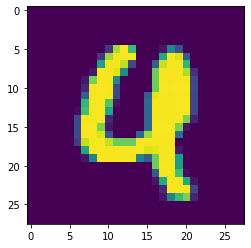

In [40]:
plt.imshow(X[0].view(28,28))
plt.show()

In [41]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(4)
